In [3]:
from manim import *
config.media_width = "100%"
_RV = "-v WARNING -qm --progress_bar None --disable_caching Example"
_RI = "-v WARNING -s --progress_bar None --disable_caching Example"

ImportError: cannot import name 'TypeIs' from 'typing_extensions' (C:\tools\Manim\Lib\site-packages\typing_extensions.py)

<span style="font-size:50px;">EQUATION</span>

In [54]:
%%manim $_RV
# part 1 of presentation 

class Example(Scene):
    def construct(self):
        ns=MathTex(r'\rho', r'\frac{D\textbf{u}}{Dt}', r'=', r'-\nabla P', r'+ \mu \nabla^2\textbf{u}', r'+ \textbf{f}', color=WHITE).scale(1.5)
        nw=MathTex( r'm', r'\textbf{a}',r'=',r'\Sigma \textbf{F}',color=WHITE).scale_to_fit_width(ns.width)
        nw.fade(0.5)
        self.add(ns)
        material_d=MathTex(r'\rho', r'( \frac{\partial u}{ \partial t} + u \cdot \nabla u)',
                 r'=', r'-\nabla P', r'+ \mu \nabla^2\textbf{u}', r'+ \textbf{f}', color=WHITE).scale(1.5)
        self.play(TransformMatchingTex(ns,material_d), run_time=2, rate_func=linear)

        
        self.wait(2)
        self.play(FadeIn(nw), run_time=3,rate_func=linear)

        self.wait(2)
        self.play(LaggedStart(FadeOut(material_d),nw.animate.set_opacity(1), run_time=1,lag_ratio=0.5, rate_func=linear))
        self.wait(2)
        
        
       
        


Manim Community v0.18.1

<span style="font-size:50px;">MASS TERM</span>

In [56]:
%%manim $_RV
# newton to navier stokes reasoning

class Example(Scene):
    def construct(self):

        #object
        obj = Circle(radius=0.3, color=RED,fill_opacity=1).scale(2)
        surface = Line(start=2*LEFT + obj.get_bottom(), end=2*RIGHT + obj.get_bottom(), color=BLUE)

        #forces
        weight = Arrow(start=2*DOWN , end=obj.get_center(), max_tip_length_to_length_ratio=0.2 , buff=0).rotate(PI)
        weight.scale(0.8,about_point=weight.get_start())
        force = Arrow(start=2*RIGHT , end=obj.get_center(), max_tip_length_to_length_ratio=0.2 , buff=0).rotate(PI)
        force.scale(0.8,about_point=force.get_start())
        friction= Arrow(start=surface.get_start() -0.8*LEFT, end=obj.get_bottom(), max_tip_length_to_length_ratio=0.2 , buff=0)

        #text
        sym= MathTex(r'\textbf{F}',r'W', r'f', color=WHITE)
        sym[0].next_to(force, RIGHT)
        sym[1].next_to(weight, DOWN)
        sym[2].next_to(friction, DOWN)
        vg=VGroup(obj, surface, force, weight, friction)
        self.play(Create(vg), run_time=2, rate_func=linear)
        self.play(Write(sym),run_time=2)
        self.wait(2)


Manim Community v0.18.1

In [57]:
class AbstractExample(ZoomedScene):
    def __init__(self, **kwargs):
        ZoomedScene.__init__(
            self,
            zoom_factor=0.3, # scale of zoomed_camera camera
            zoomed_display_height=2,
            zoomed_display_width=3,
            zoomed_camera_config={
                "default_frame_stroke_width": 2, # frame border
            },
            **kwargs
        )

    def setup(self):
        # Call ZoomedScene.setup(self)
        super().setup()
        # Define zoom mobs
        zoomed_display        = self.zoomed_display
        zoomed_display_border = zoomed_display.display_frame
        frame                 = self.zoomed_camera.frame
        # set zoom mobs props
        
        self.zoomed_objs = [zoomed_display, zoomed_display_border, frame]

In [59]:
%%manim $_RV
# newton to navier stokes reasoning

class Example(AbstractExample):
    def construct(self):

        #part of the camera
        zoomed_display, zoomed_display_border, frame = self.zoomed_objs
        zoomed_display.scale(0.85)


        #the water
        fluid=VGroup()
        
        x_min, x_max = -2, 2
        y_min, y_max = -2, 1

        for j in np.linspace(y_min, y_max, 40):
            for i in np.linspace(x_min, x_max, 40):
                point = Dot([i, j, 0],radius=0.04, color=BLUE)
                fluid.add(point)

        bottom_left = [x_min-0.1, y_min-0.1, 0]
        bottom_right = [x_max+0.1, y_min-0.1, 0]
        top_right = [x_max+0.1, y_max+0.1, 0]
        top_left = [x_min-0.1, y_max+0.1, 0]

        # Create lines (skip the top line)
        left_edge = Line(bottom_left, top_left, color=WHITE)
        bottom_edge = Line(bottom_left, bottom_right, color=WHITE)
        right_edge = Line(bottom_right, top_right, color=WHITE)
        box = VGroup(left_edge, bottom_edge, right_edge)

        vg=VGroup(fluid, box).shift(DOWN)
        self.add(vg)
        vgc=vg.copy().scale(0.5)
        
        line= Line(start=LEFT, end=RIGHT, color=WHITE).scale(1.2)
        line.next_to(zoomed_display.get_bottom(),DOWN)
        frame.shift(vg.get_center())
        

        self.play(Create(frame))
        self.activate_zooming()
        self.play(self.get_zoomed_display_pop_out_animation())
        self.play(Create(line))
        self.play(vgc.animate.next_to(line.get_center(),DOWN), run_time=2)

        rho= MathTex(r'\rho =', color=WHITE).scale(2)
        rho.next_to(line, LEFT,buff= 1)
        self.play(Write(rho))
        density= MathTex(r'm',r'V', color=WHITE).scale(2)
        density[0].next_to(zoomed_display, UP,buff=0.1)
        density[1].move_to(vgc.get_center())
        
        self.play(LaggedStart(Write(density[0]),Write(density[1]), run_time=2, lag_ratio=0.5))
        self.wait(3)


Manim Community v0.18.1

<span style="font-size:50px;">ACCELERATION TERM</span>

In [60]:
%%manim $_RV

#acceleration to vector field
class Example(Scene):
    def construct(self):

        # set up axes and graph
        axes = Axes(
            x_range=[0, 4],
            y_range=[-1, 3],
            axis_config={"color": WHITE}, 
        )

        t_label = MathTex("t").next_to(axes.x_axis, RIGHT)
        s_label = MathTex("s(t)").next_to(axes.y_axis, UP)
        labels= VGroup(t_label, s_label)
        self.add(axes,labels)
        f= lambda x: -3/4 *(x-2)**2 +3
        graph = axes.plot(f, color=RED)
        self.add(graph)

        # set up point and vector

        def get_tangent_vector(proportion, curve, scale=1):
            coord_i = curve.point_from_proportion(proportion if proportion <0.999 else proportion - 0.001)
            coord_f = curve.point_from_proportion(proportion + 0.001 if proportion <0.999 else proportion ) 
            reference_line = Line(coord_i,coord_f)
            unit_vector = reference_line.get_unit_vector() * scale
            vector = Arrow(coord_i, coord_i + unit_vector,color= YELLOW, buff=0)
            return vector

        vector = get_tangent_vector(0, graph, scale=1.5)

        dot = Dot(graph.point_from_proportion(0), color=YELLOW)
        dot.add_updater(lambda d: d.move_to(vector.get_start()))

        def tan(mob, alpha):
            mob.become(
                    get_tangent_vector(alpha,graph,scale=2))

    

        self.add(dot, vector)
        u= MathTex(r'u(t)', color=YELLOW)
        u.add_updater(lambda l: l.next_to(dot.get_center(), UP))
        self.add(u)


        self.play(UpdateFromAlphaFunc(vector, tan), run_time=8, rate_func=linear)
    
    
        
        
        self.wait(2)



       


Manim Community v0.18.1

In [61]:
%%manim $_RV
class Example(Scene):
    def construct(self):
        # Set x_range and y_range to start at 0 (positive part only)
        plane = NumberPlane().fade(1)
        self.add(plane)


        points= VGroup()
        for i in np.arange(-7,7.5,0.5):
            for j in np.arange(-4, 4.5,0.5):
                point = Dot(plane.c2p(i,j), color=BLUE, radius=0.05)
                points.add(point)

        points.fade(0.5)


        func = lambda p: np.array([p[1],p[0],0])
        gradf= lambda p: np.array([1.,1.,0])

        gradient_field = ArrowVectorField(gradf, color=BLUE)
        vector_field= ArrowVectorField(func)
        gradient_field.fade(1)
        vector_field.fade(1)
        self.add(gradient_field,vector_field)
        

        self.play(LaggedStartMap(FadeIn, points, run_time=2, lag_ratio=0.1))
        self.play(plane.animate.set_opacity(0.3))
        self.play(vector_field.animate.set_opacity(1))

        u= MathTex(r'u \cdot \nabla u', color=WHITE).scale(2).to_edge(UP)
        self.play(Write(u))
        self.add_foreground_mobject(u)

        self.play(LaggedStart(gradient_field.animate.set_opacity(1),vector_field.animate.fade(0.7), run_time=3, lag_ratio=0))
        self.wait(2)
        self.play(vector_field.animate.set_opacity(1))
        self.wait(2)

        vg=VGroup(vector_field, gradient_field)
        self.play(vg.animate.set_opacity(0.7))
        
        







        # streamlines
        stream_lines = StreamLines(func, stroke_width=2).fade(0.3)
        self.add(stream_lines)
        
       
        stream_lines.start_animation(warm_up=True, flow_speed=0.75)
        self.wait(5)

        
        
       
        

       
      

        
        
    

Manim Community v0.18.1

<span style="font-size:50px;">PRESSURE TERM</span>


In [62]:
%%manim $_RV

class Example(Scene):
    def construct(self):
        points= VGroup()
        x_min, x_max = -5, 5.5
        y_min, y_max = -2, 2.5


        for i in np.arange(x_min,x_max,0.5):
            for j in np.arange(y_min, y_max,0.5):

                alpha =(i - x_min) / (x_max - x_min)
                color = interpolate_color(BLUE, RED, alpha)
                point = Dot([i,j,0], color=color, radius=0.1)
                points.add(point)

        self.add(points)
        pressure= MathTex(r'P', color=WHITE).scale(2)
        pressure.to_edge(UP)
        self.add(pressure)

        arrow= Arrow(start=2*RIGHT, end=2*LEFT, color=WHITE).scale(1.2)
        self.play(GrowFromEdge(arrow, RIGHT),rate_func= linear, run_time=5)
        self.wait()

Manim Community v0.18.1

In [63]:
%%manim $_RV
# Gradient vector field

class Example(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70*DEGREES, theta=-120*DEGREES)

        # Axes
        axes = ThreeDAxes(x_range=(-2, 2, 1), y_range=(-2, 2, 1), z_range=(-2, 2, 1))

        # Surface function
        func = lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v))

        surface = Surface(
            func,
            resolution=30,
            v_range=[-1.5, 1.5],
            u_range=[-1.5, 1.5],
        ).fade(0.5)

        # Gradient in (u, v) space
        def gradient(u, v):
            dx = 2 * np.cos(u) * np.cos(v)
            dy = -2 * np.sin(u) * np.sin(v)
            return np.array([dx, dy])

        # Initial position in (u, v)
        u_val = ValueTracker(0.5)
        v_val = ValueTracker(0)
        
        pressure = MathTex(r' - \nabla P ')
        pressure.scale(2).to_corner(UL)
        self.add_fixed_in_frame_mobjects(pressure)
        # Dot on the surface
        dot = always_redraw(lambda: Dot3D(func(u_val.get_value(), v_val.get_value()), color=RED))

        
        arrow= always_redraw( lambda: Arrow(start=dot.get_center(), end=dot.get_center()-[1,1,0], color=RED))

        # Update function to simulate gradient descent in (u, v) space
        def update_uv(mob, dt):
            u = u_val.get_value()
            v = v_val.get_value()
            grad = gradient(u, v)
            step_size = 0.1 * dt  # adjust for smoothness
            u_val.set_value(u - step_size * grad[0])
            v_val.set_value(v - step_size * grad[1])


        dot.add_updater(update_uv)

        surface.set_fill_by_value(axes, colorscale= [(BLUE,0), (RED,0)],axis=2)


        self.add(axes, surface, dot, arrow)

        self.wait(10)
        dot.clear_updaters()

        self.wait()

Manim Community v0.18.1

<span style="font-size:50px;">VISCOISTY TERM</span>

In [64]:
%%manim $_RV

class Example(Scene):
    def construct(self):
        #sign object
        fluid=VGroup()
        
        x_min, x_max = -6*4, 6*4
        y_min, y_max = -3, 3

        for j in range(y_min, y_max, 1):
            for i in range(x_min, x_max, 1):
                point = Dot([i, j, 0],radius=0.5, color=BLUE)
                fluid.add(point)

        fluid.shift(LEFT*2)
        fluid.fade(0.5)
        

        gs=VGroup(*[ fluid[i:i+12*4] for i in range(0, len(fluid), 12*4)])
        


    
        # self.add(fluid)
        self.add(gs)
        
        rec= SurroundingRectangle(fluid, color=WHITE, buff=0.1)
        

    
        
        self.add(rec)
        
        def shift(mob, alpha):
            mob.shift(RIGHT*alpha/10)

        anim=[]
        for i in range(0, len(gs)):
            animation= UpdateFromAlphaFunc(gs[i], shift, run_time=10, rate_func=linear)
            anim.append(animation)

        anim.reverse()
        viscosity= MathTex(r'\tau = \mu \frac{du}{dy}', color=WHITE).scale(4)
        self.add_foreground_mobject(viscosity)

        self.play(LaggedStart(*anim, lag_ratio=0.05))
        self.wait(2)
            
        
        

        
            
        
        

        

    

Manim Community v0.18.1

Manim Community v0.18.1

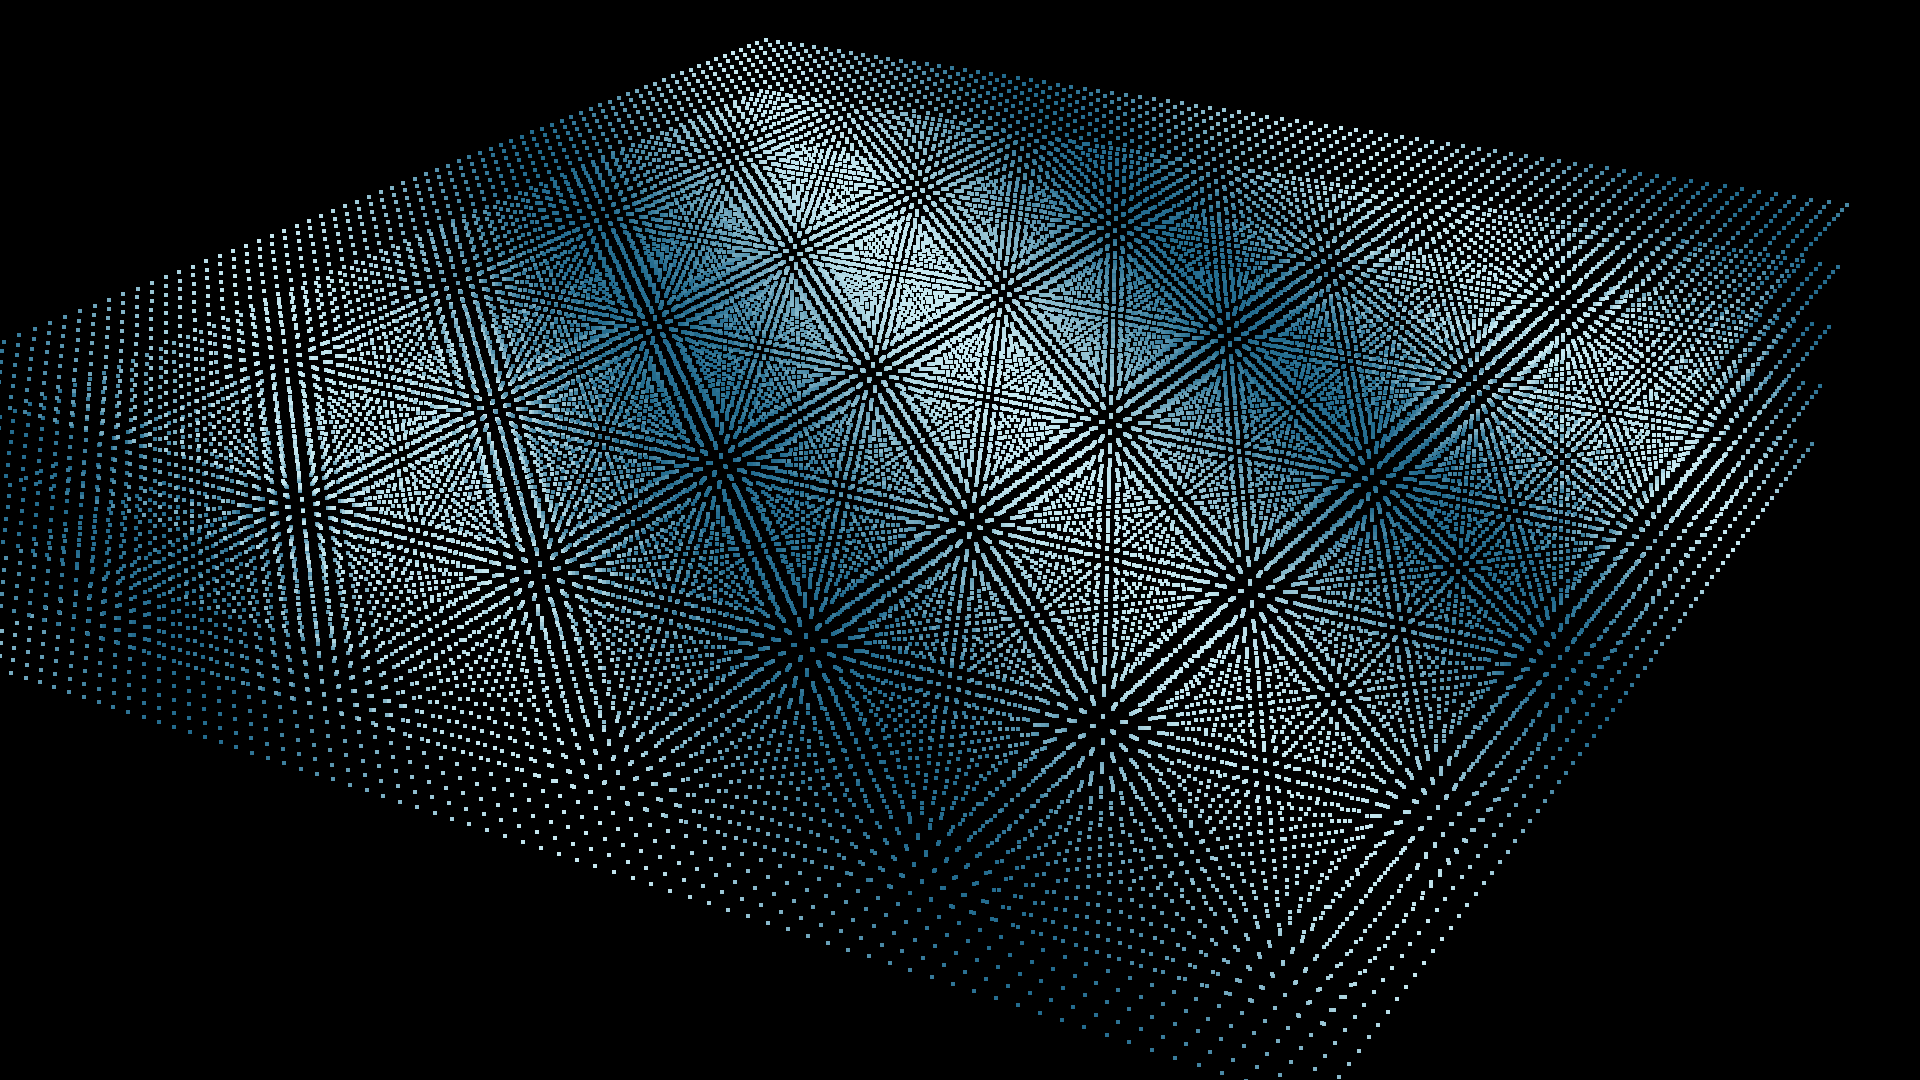

In [176]:
%%manim $_RI


class Example(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=65 * DEGREES, theta=-60 * DEGREES)

        axes = ThreeDAxes(x_range=[-3, 3], y_range=[-3, 3], z_range=[-1, 3])
        # self.add(axes)

        # Number of layers
        num_layers = 5
        z_values = np.linspace(0, 2, num_layers)

        layers = PGroup()

        for z in z_values:
            dots = PGroup()

            for x in np.linspace(-5, 5, 75):
                for y in np.linspace(-5, 5, 75):
                    # Example scalar field: u = sin(x + y + z)
                    u = np.sin(x + y + z)

                    # Normalize value to [0, 1] for color
                    norm_val = (u + 1) / 2  # sin() ∈ [-1,1]
                    color = interpolate_color(BLUE_E, BLUE_A, norm_val)

                    dot = Point((x, y, z),color=color).scale(2)
                    dots.add(dot)

            layers.add(dots)

        self.add(layers)

        # self.play(FadeIn(layers), run_time=2)
        # self.wait()


In [65]:
%%manim $_RV
class Example(Scene):
    def construct(self):   
        func = lambda pos: (pos[0] * UR + pos[1] * LEFT) - pos
        # st=StreamLines(div_field, stroke_width=2,x_range=[-10, 10, 0.5], y_range=[-6, 6, 0.5])
        vf= ArrowVectorField(func, x_range=[-10, 10, 0.5], y_range=[-6, 6, 0.5])
        self.add(vf)


        dot = Dot(point=[-2,2,0])
        dot.add_updater(vf.get_nudge_updater())
        moving_vector = Vector()
        
        moving_vector.add_updater(lambda mob: mob.become(
            Vector(func(dot.get_center())).shift(dot.get_center())
        ))   
        moving_vector.add_updater(vf.get_nudge_updater(pointwise=True))
        self.add(dot, moving_vector)
        self.wait(5)



Manim Community v0.18.1

In [66]:
def f3(x,y):
    # f= np.sin(x) * np.sin(y)
    # f= np.log(x**2 + y**2)
    # f= 3/(1+x**2 + y**2)
    f= np.cos(x) + np.sin(y) 
    return np.array([x,y,f])

In [67]:
def grad(x,y):
    dx = -np.sin(x)
    dy = np.cos(y)
    return np.array([dx,dy, f3(x,y)[2]])

Manim Community v0.18.1

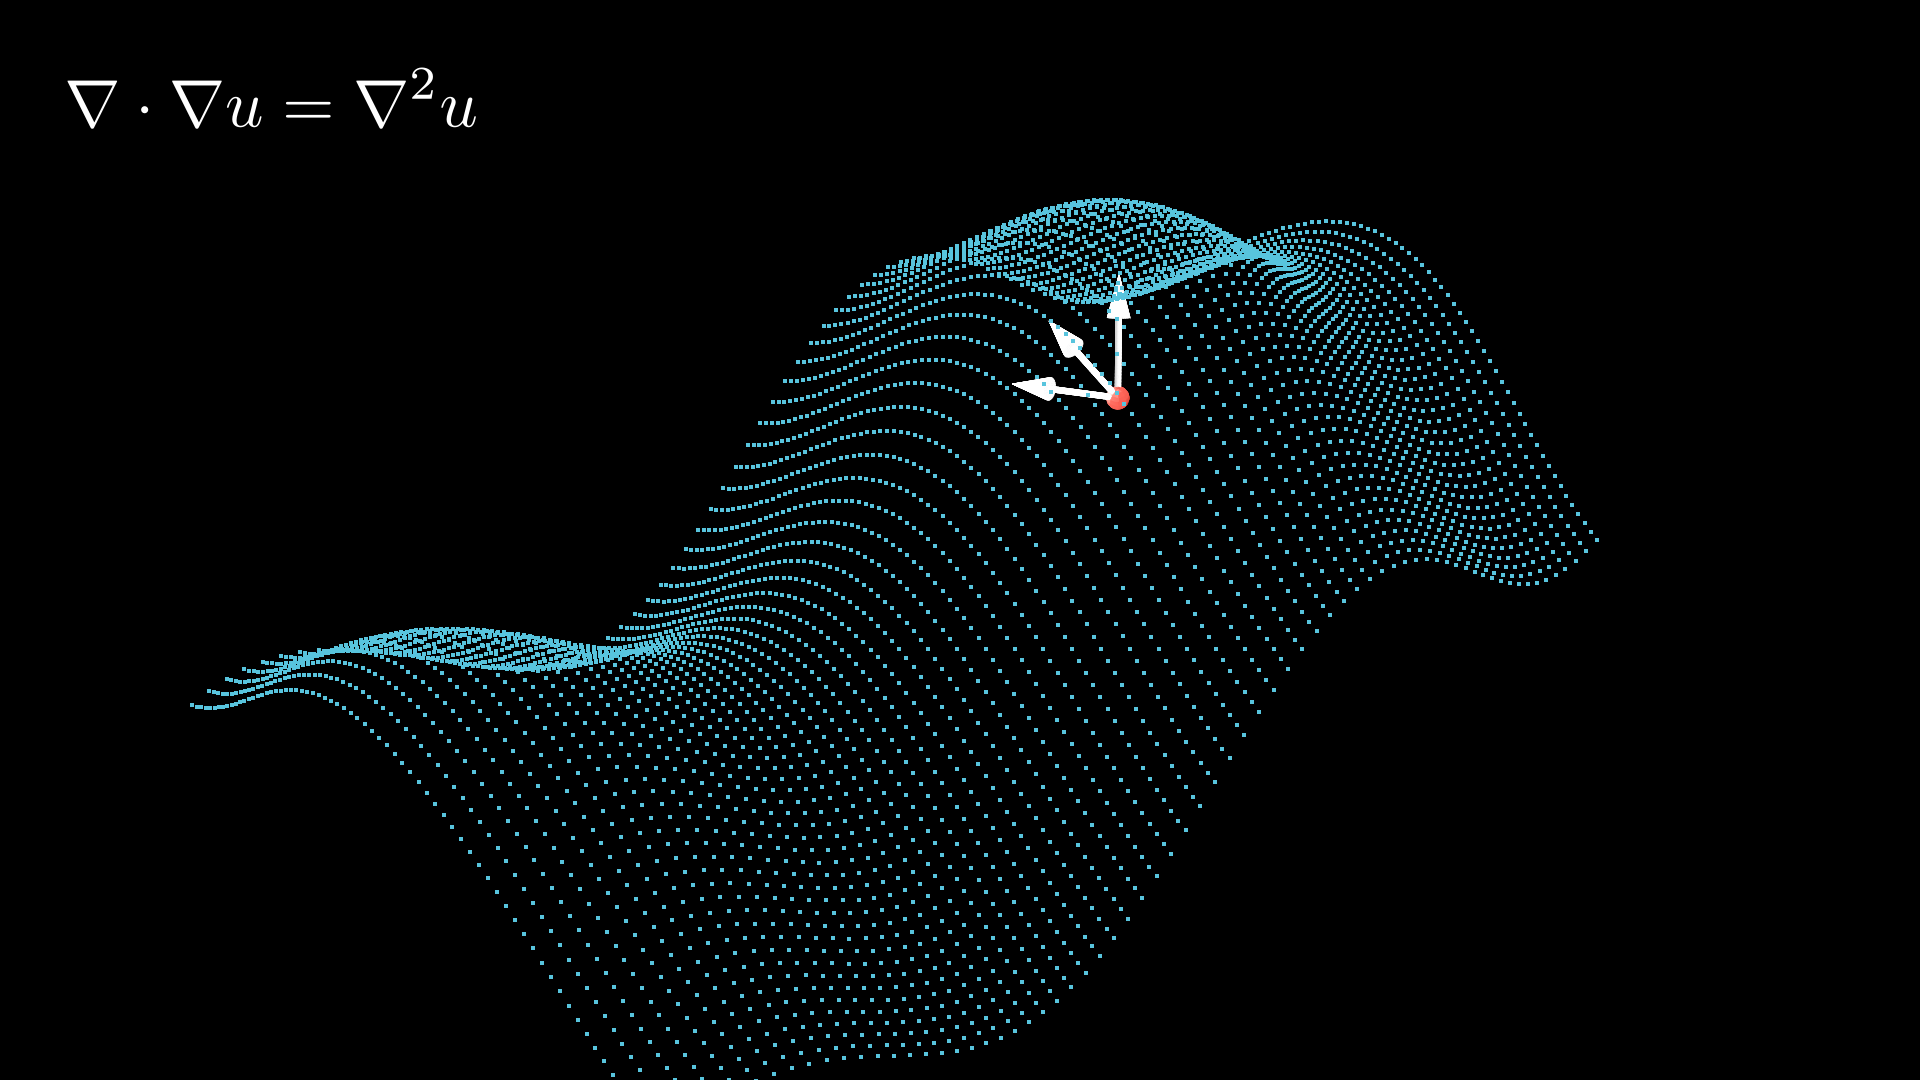

In [ ]:
%%manim $_RV

class Example(ThreeDScene):
    def construct(self):
        points=PGroup()
        # ax=ThreeDAxes(x_range=[-5, 5], y_range=[-5, 5], z_range=[-1, 1], axis_config={"color": WHITE})
        # self.add(ax)
        self.set_camera_orientation(phi=0*DEGREES, theta=0*DEGREES)
        for j in np.linspace(-5, 5, 70):
            for i in np.linspace(-2.5, 2.5, 70):
                point = Point(f3(i,j), color=WHITE)
                point.set_color(BLUE)
                points.add(point)

        
        
     
        self.play(FadeIn(points), run_time=3)
        self.move_camera(phi=45 * DEGREES, theta=-45 * DEGREES,run_time=3)
        self.wait(2)
      
        max_p= (PI/4,PI/4)

        
        dot= Dot3D(f3(*max_p), color=RED)
        
        t= Arrow3D(start=f3(*max_p), end=f3(*max_p)+0.5*grad(*max_p), color=WHITE)
        b= t.copy().rotate(PI/2,about_point=dot.get_center(), axis=RIGHT)
        n= t.copy().rotate(PI/2,about_point=dot.get_center(), axis=OUT)
        vg= VGroup(t,n,b,dot)
        
  
        self.play(LaggedStartMap(Create,vg, run_time=1))
        diff= MathTex(r'\nabla \cdot \nabla u = \nabla ^2 u', color=WHITE).to_corner(UL)
     
        self.add_fixed_in_frame_mobjects(diff)
        self.play(Write(diff), run_time=2)
        self.wait(2)

<span style="font-size:50px;">Divergence</span>

In [75]:
def div_field(p):
    epsilon=1
    x , y , z =  p
    # Source-like terms
    fx1 = (x - 2) / ((x - 2)**2 + (y - 2)**2 + epsilon)
    fy1 = (y - 2) / ((x - 2)**2 + (y - 2)**2 + epsilon)

    fx2 = (x + 2) / ((x + 2)**2 + (y + 2)**2 + epsilon)
    fy2 = (y + 2) / ((x + 2)**2 + (y + 2)**2 + epsilon)

    # Sink-like terms
    fx3 = (x - 2) / ((x - 2)**2 + (y + 2)**2 + epsilon)
    fy3 = (y + 2) / ((x - 2)**2 + (y + 2)**2 + epsilon)

    fx4 = (x + 2) / ((x + 2)**2 + (y - 2)**2 + epsilon)
    fy4 = (y - 2) / ((x + 2)**2 + (y - 2)**2 + epsilon)

    # Net vector
    fx = fx1 + fx2 - fx3 - fx4
    fy = fy1 + fy2 - fy3 - fy4

    return np.array([fx, fy,0])

In [76]:
def pointers(p, n=5, radius=0.5,sign=1):
    terminal_point = p
    vectors=VGroup()
    for i in range(n):
            angle = 2 * PI * i / n
            origin = terminal_point + radius * np.array([np.cos(angle), np.sin(angle), 0])
            new_terminal = terminal_point + 1.2*np.array([np.cos(angle), np.sin(angle), 0])
            vector = Arrow(start=origin, end=new_terminal , buff=0, color=BLUE)
            if sign == 1:
                vector.rotate(PI)
            vectors.add(vector)
    return vectors


In [ ]:
%%manim $_RV
class Example(Scene):
    def construct(self):   
        divP=MathTex(r'\nabla \cdot \textbf{u} < 0', color=WHITE)
        divN=MathTex(r'\nabla \cdot \textbf{u} > 0', color=WHITE)

        
        st=StreamLines(div_field, stroke_width=2,x_range=[-10, 10, 0.5], y_range=[-6, 6, 0.5])
        vf= ArrowVectorField(div_field, x_range=[-10, 10, 0.5], y_range=[-6, 6, 0.5])
        self.add(vf)

        v1= pointers([-2.3,2.2,0], n=10, radius=0.5)
        v2= pointers([-2.3,-2.2,0], n=10, radius=0.5, sign=-1)
        v3= pointers([2.3,2.2,0], n=10, radius=0.5, sign=-1)
        v4= pointers([2.3,-2.2,0], n=10, radius=0.5)
        vg=VGroup(v1,v2,v3,v4)

        self.add(st)
        st.start_animation(warm_up=True, flow_speed=1)
        self.wait(5)
        self.play(LaggedStartMap(Create, vg, run_time=2, lag_ratio=0.1))
        self.wait(2)
        divP.next_to(v1, DOWN)
        divN.next_to(v2, UP)
        self.play(Write(divP), run_time=1)
        self.play(Write(divN), run_time=1)
        self.wait(2)
        self.play(LaggedStartMap(FadeOut, vg, run_time=2, lag_ratio=0.1))

Manim Community v0.18.1

In [ ]:
def stokes_flow(v,R=0.3,U=1.0):
    
    x,y , z = v
    """
    Creeping flow (Re << 1) around a cylinder of radius R
    in 2D at uniform flow speed U.
    """
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    
    if r < R:
        return np.array([0.0, 0.0,0.0])  # inside the cylinder, no flow

    # Radial and angular velocity components (u_r, u_theta)
    ur = U * (1 - (R**2 / r**2)) * np.cos(theta)
    ut = -U * (1 + (R**2 / r**2)) * np.sin(theta)

    # Convert to Cartesian
    u = ur * np.cos(theta) - ut * np.sin(theta)
    v = ur * np.sin(theta) + ut * np.cos(theta)

    return np.array([u, v, 0.0])


In [ ]:
%%manim $_RV
class Example(Scene):
    def construct(self):   
        st=StreamLines(stokes_flow, stroke_width=2,x_range=[-10, 10, 0.5], y_range=[-6, 6, 0.5])
        vf= ArrowVectorField(stokes_flow, x_range=[-10, 10, 0.5], y_range=[-6, 6, 0.5])
        self.add(vf, st)
        div=MathTex(r'\nabla \cdot \textbf{u} = 0', color=WHITE).scale(2)
        self.add(div)
        
        st.start_animation(warm_up=False, flow_speed=.75)
        self.wait(5)



Manim Community v0.18.1